# Kasus Detektif Data

## Persiapan

In [3]:
import pandas as pd
df = pd.read_csv('data/error_log_updated.csv')
df.head(5)

,Timestamp,Jenis Error,Pesan Error,User ID,Versi Aplikasi,Lokasi,Platform,Severity Level,Browser/User Agent,Sistem Operasi,Response Time (ms),Network Latency (ms),CPU Usage (%)
0,2024-01-01 00:00:00,InvalidInputException,I/O error occurred,user97,v1.0,Medan,Web,Warning,Firefox 108,macOS 13,813,32,53
1,2024-01-01 00:44:41,InvalidInputException,Resource not found,user44,v1.0,Makassar,Web,Debug,Chrome 110,Windows 10,4412,20,78
2,2024-01-01 01:29:22,NullPointerException,Resource not found,user80,v2.0,Bandung,Android,Error,Safari 16,Windows 10,4858,159,94
3,2024-01-01 02:14:03,Connection Error,Timeout while processing request,user61,v1.1,Jakarta,iOS,Debug,Chrome 110,Windows 10,4766,78,33
4,2024-01-01 02:58:44,ResourceNotFoundException,Resource not found,user43,v2.0,Jakarta,Web,Info,Edge 109,Android 13,2963,106,33


In [5]:
# Mengubah kolom 'Timestamp' ke tipe data datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
# Menghapus baris dengan nilai null (jika ada)
df.dropna(inplace=True)

## Penyelidikan

### Identifikasi Jenis Error

In [8]:
jenis_error_counts = df['Jenis Error'].value_counts()
jenis_error_counts


Jenis Error
Connection Error             329
NullPointerException         229
InvalidInputException        187
ResourceNotFoundException    144
Timeout Exception             58
IOException                   53
Name: count, dtype: int64

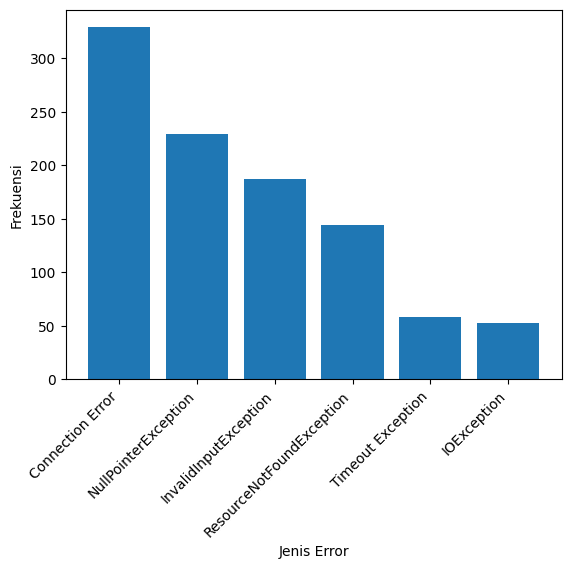

In [9]:
import matplotlib.pyplot as plt

plt.bar(jenis_error_counts.index, jenis_error_counts.values)
plt.xlabel("Jenis Error")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')
plt.show()

### Analisis Error

In [11]:
# Grouping data berdasarkan jam
error_per_jam = df.groupby(df['Timestamp'].dt.hour).size()
error_per_jam

Timestamp
0     43
1     42
2     41
3     42
4     42
5     41
6     42
7     41
8     42
9     42
10    41
11    42
12    42
13    41
14    42
15    41
16    42
17    42
18    41
19    42
20    42
21    41
22    42
23    41
dtype: int64

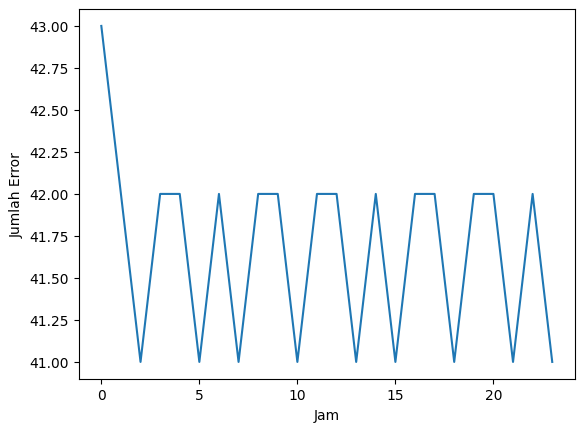

In [12]:
# Visualisasi dengan line chart
plt.plot(error_per_jam.index, error_per_jam.values)
plt.xlabel("Jam")
plt.ylabel("Jumlah Error")
plt.show()

In [13]:
# Crosstab antara Jenis Error dan Platform
crosstab = pd.crosstab(df['Jenis Error'], df['Platform'])
crosstab

Platform,Android,Web,iOS
Jenis Error,,,
Connection Error,111,103,115
IOException,16,16,21
InvalidInputException,70,63,54
NullPointerException,84,73,72
ResourceNotFoundException,54,41,49
Timeout Exception,27,21,10


### Analisis Performa

In [14]:
rata_rata_response_time = df.groupby('Jenis Error')['Response Time (ms)'].mean()
rata_rata_response_time

Jenis Error
Connection Error             2799.185410
IOException                  2799.075472
InvalidInputException        2669.577540
NullPointerException         2539.567686
ResourceNotFoundException    2653.555556
Timeout Exception            2649.258621
Name: Response Time (ms), dtype: float64

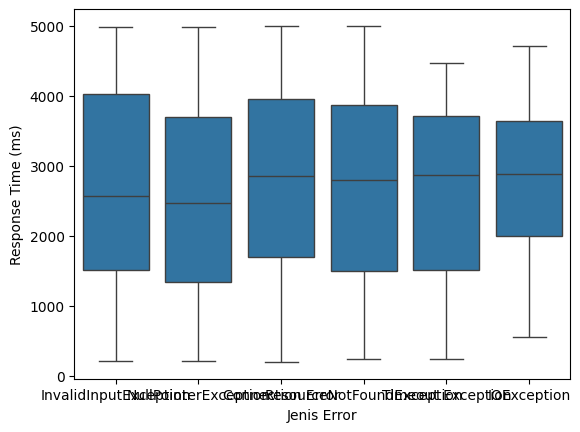

In [15]:
import seaborn as sns

sns.boxplot(x='Jenis Error', y='Response Time (ms)', data=df)
plt.show()